<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Documento_y_ejercicio_a_desarrollar_Clasificaci%C3%B3n_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ==============================================================================
# LIBRERIAS
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archivo cargado. Dimensiones originales: (40000, 2)
                                              Review  Sentimiento
0  I grew up (b. 1965) watching and loving the Th...            0
1  When I put this movie in my DVD player, and sa...            0
2  Why do people who do not know what a particula...            0
3  Even though I have great interest in Biblical ...            0
4  Im a die hard Dads Army fan and nothing will e...            1

--- PREPROCESAMIENTO ---
Limpiando textos...

--- EDA ---
Sentimiento
0    20019
1    19981
Name: count, dtype: int64


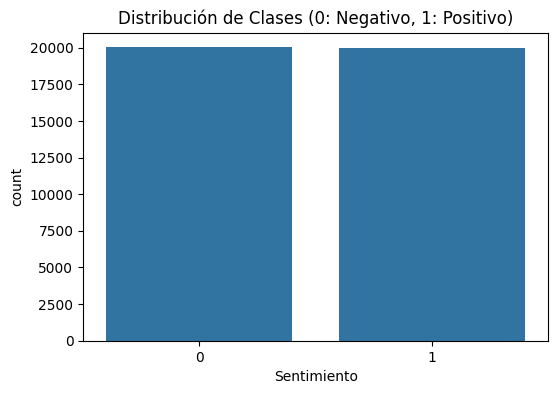


 PROCESANDO: BAG OF WORDS
Entrenando Naive Bayes...

--> Modelo: Naive Bayes
Matriz de Confusión:
[[3347  619]
 [ 688 3346]]
Entrenando SVM...

--> Modelo: SVM
Matriz de Confusión:
[[3399  567]
 [ 544 3490]]
Entrenando Random Forest...

--> Modelo: Random Forest
Matriz de Confusión:
[[3369  597]
 [ 731 3303]]
Entrenando kNN...

--> Modelo: kNN
Matriz de Confusión:
[[2703 1263]
 [1702 2332]]
Entrenando Logistic Regression...

--> Modelo: Logistic Regression
Matriz de Confusión:
[[3409  557]
 [ 522 3512]]

 PROCESANDO: TF-IDF
Entrenando Naive Bayes...

--> Modelo: Naive Bayes
Matriz de Confusión:
[[3348  618]
 [ 606 3428]]
Entrenando SVM...

--> Modelo: SVM
Matriz de Confusión:
[[3441  525]
 [ 492 3542]]
Entrenando Random Forest...

--> Modelo: Random Forest
Matriz de Confusión:
[[3357  609]
 [ 739 3295]]
Entrenando kNN...

--> Modelo: kNN
Matriz de Confusión:
[[2738 1228]
 [ 833 3201]]
Entrenando Logistic Regression...

--> Modelo: Logistic Regression
Matriz de Confusión:
[[3451  515]


,Modelo,Clase 0 Precision,Clase 0 Recall,Clase 0 F1-Score,Clase 1 Precision,Clase 1 Recall,Clase 1 F1-Score,Accuracy,AUC-ROC
0,Naive Bayes,0.829,0.844,0.837,0.844,0.829,0.837,0.837,0.904
1,SVM,0.862,0.857,0.860,0.860,0.865,0.863,0.861,0.931
2,Random Forest,0.822,0.849,0.835,0.847,0.819,0.833,0.834,0.910
3,kNN,0.614,0.682,0.646,0.649,0.578,0.611,0.629,0.671
4,Logistic Regression,0.867,0.860,0.863,0.863,0.871,0.867,0.865,0.934




 TABLA 2: RESULTADOS TF-IDF


,Modelo,Clase 0 Precision,Clase 0 Recall,Clase 0 F1-Score,Clase 1 Precision,Clase 1 Recall,Clase 1 F1-Score,Accuracy,AUC-ROC
0,Naive Bayes,0.847,0.844,0.845,0.847,0.850,0.849,0.847,0.920
1,SVM,0.875,0.868,0.871,0.871,0.878,0.874,0.873,0.945
2,Random Forest,0.820,0.846,0.833,0.844,0.817,0.830,0.832,0.914
3,kNN,0.767,0.690,0.727,0.723,0.794,0.756,0.742,0.810
4,Logistic Regression,0.884,0.870,0.877,0.874,0.888,0.881,0.879,0.950


In [4]:
# ==============================================================================
# CARGA DE DATASET
# ==============================================================================
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Resources/IMDB Reviews.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Archivo cargado. Dimensiones originales: {df.shape}")
    df.rename(columns = {"text": "Review", "label": "Sentimiento"}, inplace = True)

    print(df.head())

except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo en: {file_path}")
    raise

# ==============================================================================
# PREPROCESAMIENTO
# ==============================================================================

print("\n--- PREPROCESAMIENTO ---")
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
  text = str(text).lower()
  text = re.sub(r'[^a-z\s]', '', text)
  words = text.split()
  words = [stemmer.stem(word) for word in words if word not in stop_words]
  return ' '.join(words)

print("Limpiando textos...")
df['clean_review'] = df['Review'].apply(preprocess_text)

# ==============================================================================
# EDA
# ==============================================================================

print("\n--- EDA ---")
conteo = df['Sentimiento'].value_counts()
print(conteo)

plt.figure(figsize=(6,4))
sns.countplot(x='Sentimiento', data=df)
plt.title('Distribución de Clases (0: Negativo, 1: Positivo)')
plt.show()

# ==============================================================================
# MODELOS
# ==============================================================================

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(dual = False, max_iter = 2000),
    "Random Forest": RandomForestClassifier(n_estimators = 50, n_jobs = -1, random_state = 42),
    "kNN": KNeighborsClassifier(n_neighbors = 5),
    "Logistic Regression": LogisticRegression(max_iter = 1000)
}

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    try:
        if hasattr(modelo, "predict_proba"):
            y_prob = modelo.predict_proba(X_test)[:, 1]
        else:
            y_prob = modelo.decision_function(X_test)
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = 0.0

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    cm = confusion_matrix(y_test, y_pred)
    print(f"\n--> Modelo: {nombre}")
    print("Matriz de Confusión:")
    print(cm)

    return {
        'Modelo': nombre,
        'Clase 0 Precision': round(report['0']['precision'], 3),
        'Clase 0 Recall': round(report['0']['recall'], 3),
        'Clase 0 F1-Score': round(report['0']['f1-score'], 3),
        'Clase 1 Precision': round(report['1']['precision'], 3),
        'Clase 1 Recall': round(report['1']['recall'], 3),
        'Clase 1 F1-Score': round(report['1']['f1-score'], 3),
        'Accuracy': round(acc, 3),
        'AUC-ROC': round(auc, 3)
    }

# ==============================================================================
# EJECUCION Y TABLAS
# ==============================================================================

X = df['clean_review']
y = df['Sentimiento']
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

cols_finales = ['Modelo', 'Clase 0 Precision', 'Clase 0 Recall', 'Clase 0 F1-Score', 'Clase 1 Precision', 'Clase 1 Recall', 'Clase 1 F1-Score', 'Accuracy', 'AUC-ROC']

print("\n======================================")
print(" PROCESANDO: BAG OF WORDS")
print("======================================")

vectorizer_bow = CountVectorizer(max_features = 3000)
X_train_bow = vectorizer_bow.fit_transform(X_train_raw)
X_test_bow = vectorizer_bow.transform(X_test_raw)

res_bow = []
for nombre, modelo in models.items():
    print(f"Entrenando {nombre}...")
    res_bow.append(evaluar_modelo(nombre, modelo, X_train_bow, X_test_bow, y_train, y_test))

tabla_bow = pd.DataFrame(res_bow)[cols_finales]

print("\n======================================")
print(" PROCESANDO: TF-IDF")
print("======================================")
vectorizer_tfidf = TfidfVectorizer(max_features = 3000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train_raw)
X_test_tfidf = vectorizer_tfidf.transform(X_test_raw)

res_tfidf = []
for nombre, modelo in models.items():
    print(f"Entrenando {nombre}...")
    res_tfidf.append(evaluar_modelo(nombre, modelo, X_train_tfidf, X_test_tfidf, y_train, y_test))

tabla_tfidf = pd.DataFrame(res_tfidf)[cols_finales]

print("\n\n===================================")
print(" TABLA 1: RESULTADOS BAG OF WORDS")
print("===================================")
display(tabla_bow)

print("\n\n===================================")
print(" TABLA 2: RESULTADOS TF-IDF")
print("===================================")
display(tabla_tfidf)



---



# **Análisis de Resultados**

**1. ¿Cuál fue el mejor modelo en cada una de las tablas?**

**En la tabla 1 (Bag of Words):**

*   **Mejor Modelo:** Logistic Regression
*   **Justificación:** Obtuvo el Accuracy más alto (0.865) y el AUC-ROC más alto (0.934). Esto indica que es el modelo que mejor generaliza y el que tiene la mayor capacidad para distinguir entre clases positivas y negativas.

**En la tabla 2 (TF-IDF):**

*   **Mejor Modelo:** Logistic Regression
*   **Justificación:** Nuevamente, este modelo superó a los demás con un accuracy de 0.879 y un AUC-ROC de 0.950. Un AUC de 0.950 es excelente, indicando una separabilidad casi perfecta de las clases. Además, sus métricas de Precision y Recall están muy balanceadas (ambas alrededor de 0.88), lo que se refleja en su F1-Score.

**2. ¿En qué estrategia funcionaron mejor los algoritmos de clasificación, en Bag of Words o en TF-IDF?**

**Estrategia ganadora:** TF-IDF
**Justificación:** Al comparar las dos tablas, observamos una mejora generalizada en casi todos los modelos al usar TF-IDF.

*   1. Mejora en métricas:
    * Logistic Regression subió su Accuracy de 86.6% a 87.9%
    * SVM subió de 86.1% a 87.3%
    * Naive Bayes mejoró de 83.7% a 84.7%

*   2. El caso crítico de kNN:
    * El cambio más drástico se ve en el algoritmo kNN. En Bag of Words, tuvo un desempeño pobre (Accuracy 62.9%), pero con TF-IDF subió significativamente a 74.2%.
    * Por qué sucede esto: kNN se basa en distancias. En Bag of Words, las palabras muy frecuentes (que no aportan mucho sentimiento) inflan las distancias, confundiendo al modelo. TF-IDF penaliza estas palabras comunes y da peso a las palabras únicas (que realmente definen el sentimiento), permitiendo que kNN encuentre "vecinos" que realmente se parecen semánticamente.

    Conclusion: TF-IDF es superior para este dataset porque normaliza la frecuencia de los términos, permitiendo que los modelos se enfoquen en las palabras que realmente distinguen una reseña positiva de una negativa, reduciendo el ruido de las palabras que simplemente se repiten mucho.